# Effects of Loan Characteristics on Borrower's ProsperScore/Rating


## by Emmanuel Momoh

## Investigation Overview


In this investigation, I focused majorly on the influence of ProsperScore and Prosper Rating on other variables
such as  Income Range, Employment Status, wether or not the Borrower has a home and Loan's current days of Delinquent.From the visualizations I noticed the following

* ProsperScore tends to increase as Income Range Increases, which means both variables are positively correlated (borrowers earning $100,000+ tend to have highest prosper scores than the rest)

* High number of days delinquent, the lower Prosper and vice-versa. Therefore, its safe to say borrowers with high prosper score hardly default in loan repayment

* Employement seems to be a significant factor that affects the prosper Rating, in that those who are employed seemed to have higher prosper ratings in that group.


## Dataset Overview

The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv),with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sb
sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(11,7)})
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('loan.csv')


## Distribution of ProsperScore

Lets take a look at the distribution of `ProsperScore`, this is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Note : This is only applicable for loans originated after July 2009.

From this distribution, most Borrower's seemed to have prosperscore of 4 , 6 and then 8. Only a few customers have low prosperscore between the range of 2-3 and 9-10

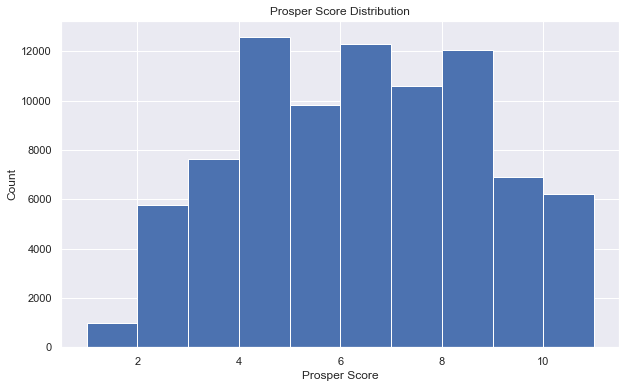

In [3]:
# Since this variable is only applicable to loans originated after JULY 2009, Lets create a seperate dataframe to see the distribution.
df1 = df.query('LoanOriginationDate > "2009-07-31 00:00:00"')

#now lets take alook at the distribution of prosperscore amongst borrowers
plt.figure(figsize=[10, 6])
plt.hist(data = df1, x = 'ProsperScore')
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Prosper Score Distribution')
plt.show()

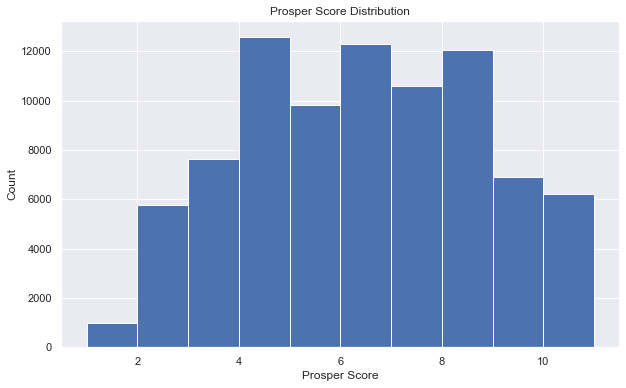

## Prosper Score VS Income Range

> Plotting the Prosper Score VS Income Range,It was Observed that ProsperScore tends to increase as Income Range Increases, which means both variables are positively correlated (borrowers earning $100,000+ tend to have highest prosper scores than the rest in the group)

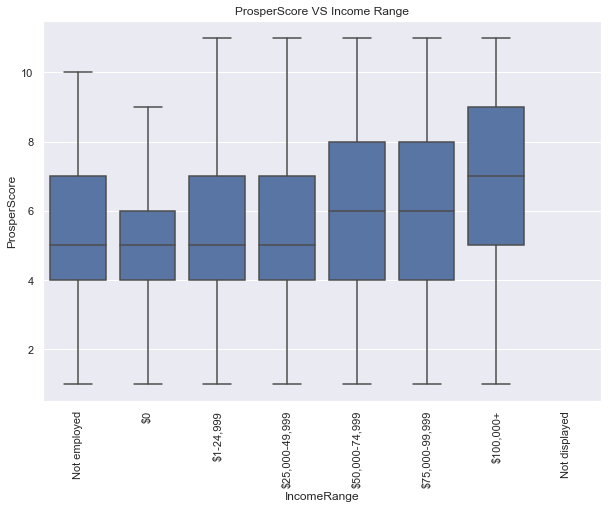

In [7]:
# First, I'll set the classes of income range in order
sal_classes = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']

# This returns the income_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
sclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sal_classes)

# Use pandas.astype() to convert the "IncomeRange" column from a plain object type into an ordered categorical type 
df['IncomeRange'] = df['IncomeRange'].astype(sclasses);
base_color= sb.color_palette()[0]
sb.boxplot(data=df, x='IncomeRange',y='ProsperScore', color=base_color,)
sb.set(rc={'figure.figsize':(10,7)})
plt.title('ProsperScore VS Income Range')
plt.xticks(rotation=90);

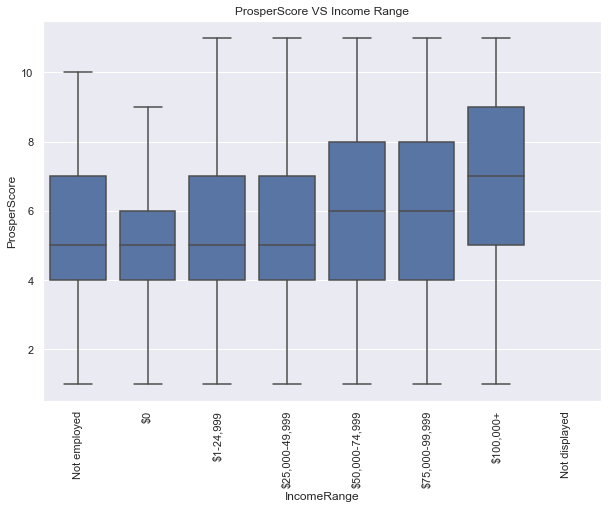

## ProsperScore VS Loan Days Of Delinquent

From this plot, its observed that a higher number of days delinquent has a negative impact on borrowers Prosper scores.
Borrowers with Higher Prosperscore tend to have little to no number of days delinquent and vice versa.

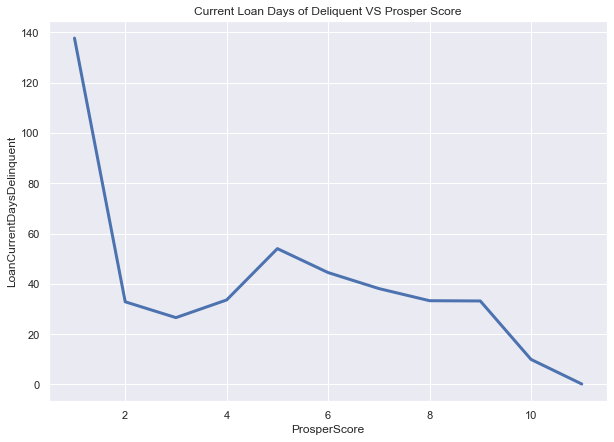

In [5]:
sb.lineplot(data=df, x='ProsperScore', y= 'LoanCurrentDaysDelinquent',ci=None, linewidth=3)
plt.title('Current Loan Days of Deliquent VS Prosper Score');

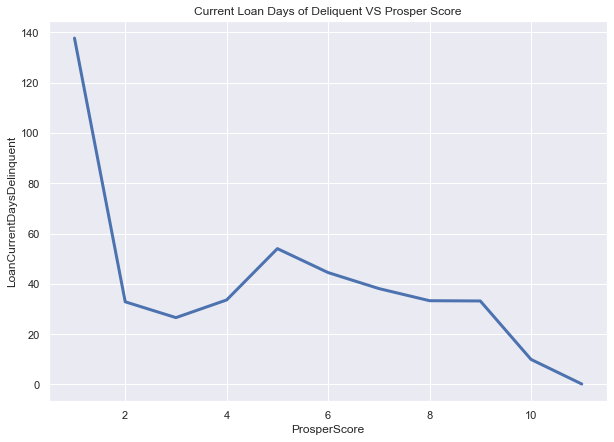

In [ ]:
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve --no-input --no-prompt